# THE SPARKS FOUNDATION

TASK 4: EXPLORATORY DATA ANALYSIS-RETAIL

Objective: To perform exploratory data analysis on 'Global Terrorism' dataset.

Author: RHYTHM RASTOGI

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [32]:
df = pd.read_csv(r"C:\Users\RHYTHM RASTOGI\Desktop\globalterrorism.csv",encoding='latin1') #Loading the dataset
df.shape #Give dimensions of the dataset

(181691, 135)

In [33]:
df.head() #to get first 5 rows

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

Choosing useful columns out of 135 columns

In [35]:
df = df[['iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude',"attacktype1_txt",'nkill','nwound','target1','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [8]:
df.isnull().sum() #check for null values in the columns

iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
nkill               10313
nwound              16311
target1               636
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

Among all columns kill and Wound are very useful columns but has many null values so we will fill the null values with 0.

In [9]:
df['nwound'] = df['nwound'].fillna(0)
df['nkill'] = df['nkill'].fillna(0)

In [10]:
df['casualties']=df['nkill']+df['nwound']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
iyear              181691 non-null int64
imonth             181691 non-null int64
iday               181691 non-null int64
country_txt        181691 non-null object
provstate          181270 non-null object
region_txt         181691 non-null object
city               181257 non-null object
latitude           177135 non-null float64
longitude          177134 non-null float64
attacktype1_txt    181691 non-null object
nkill              181691 non-null float64
nwound             181691 non-null float64
target1            181055 non-null object
summary            115562 non-null object
gname              181691 non-null object
targtype1_txt      181691 non-null object
weaptype1_txt      181691 non-null object
motive             50561 non-null object
casualties         181691 non-null float64
dtypes: float64(5), int64(3), object(11)
memory usage: 26.3+ MB


In [12]:
df.describe() #statistical information about numerical column variables

,iyear,imonth,iday,latitude,longitude,nkill,nwound,casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Visualization of Data

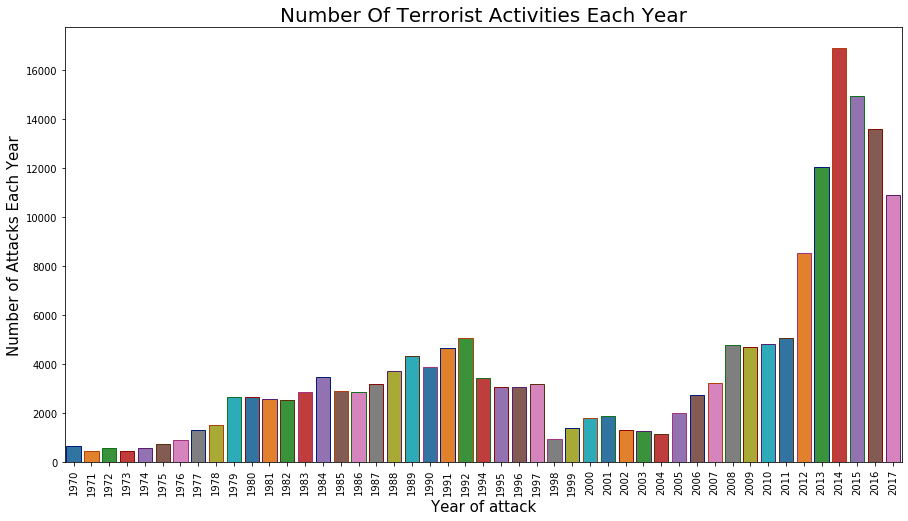

In [18]:
plt.subplots(figsize=(15,8))
sn.countplot('iyear',data=df,palette='tab10',edgecolor=sn.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack',fontsize=15)
plt.ylabel('Number of Attacks Each Year',fontsize=15)
plt.title('Number Of Terrorist Activities Each Year',fontsize=20)
plt.show()

Most attacks occured in the year 2014 followed by 2015.

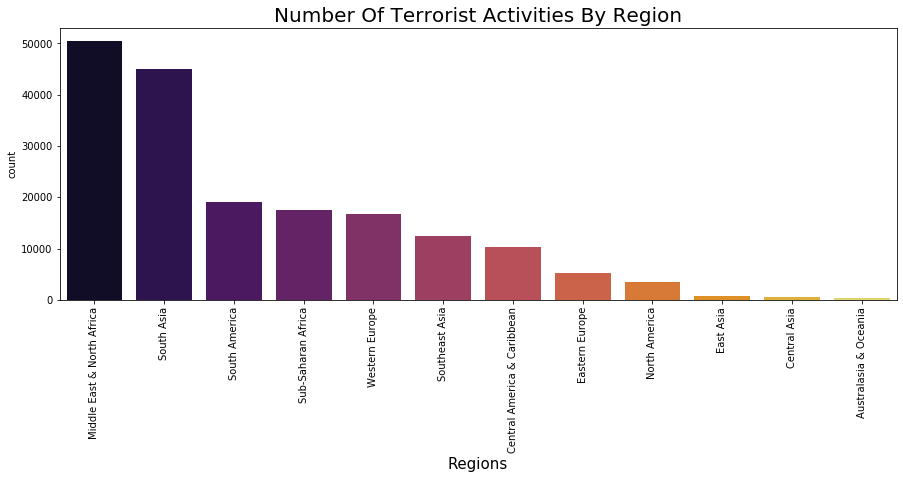

In [20]:
#Regionwise no. of  terrorist activities
plt.subplots(figsize=(15,5))
sn.countplot('region_txt',data=df,palette='inferno',order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions',fontsize=15)
plt.title('Number Of Terrorist Activities By Region',fontsize=20)
plt.show()

Most affceted region due to terrorist activities is Middle east and North Africa.

In [21]:
#top 10 countries with most number of attacks.
df['country_txt'].value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

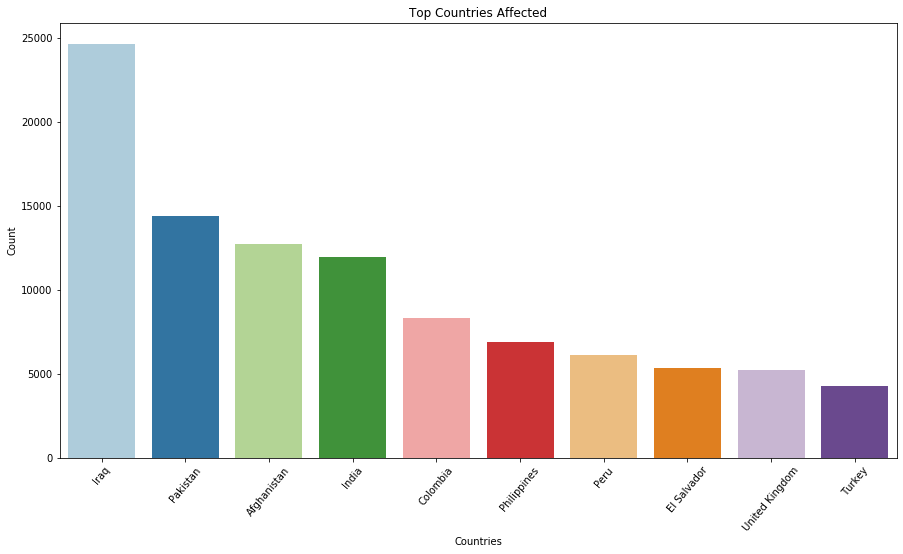

In [22]:
plt.subplots(figsize=(15,8))
sn.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values,palette="Paired")
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

Iraq has faced most number of attacks.

In [23]:
#top 10 groups who performed most terrorist activities.
df['gname'].value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: gname, dtype: int64

Group which performed most number of terrorist activities is Taliban.

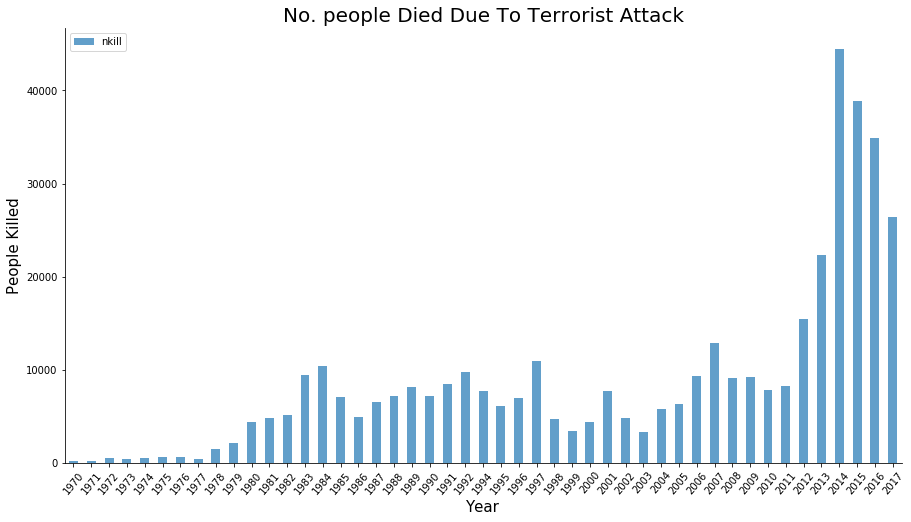

In [25]:
# Number of people died due to terrorist activities each year.
df = df[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(15,8))
df.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("No. people Died Due To Terrorist Attack",fontsize=20)
plt.ylabel("People Killed",fontsize=15) 
plt.xlabel('Year',fontsize=15)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

Most number of people died in 2014 than in other year.

In [39]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

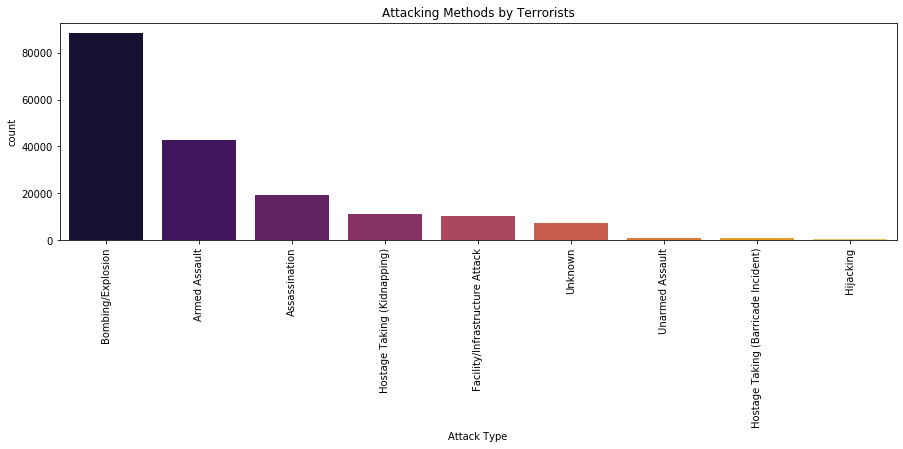

In [38]:
plt.subplots(figsize=(15,4))
sn.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

Most common attacking method of the terrorist is Bombing/Explosion.

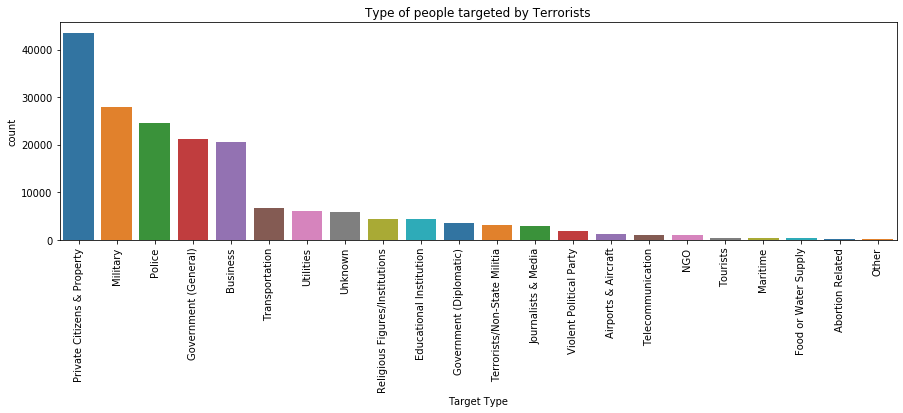

In [42]:
plt.subplots(figsize=(15,4))
sn.countplot('targtype1_txt',data=df,palette='tab10',order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Type of people targeted by Terrorists')
plt.show()

Most common target of the terrorist is Private Citizens and Property

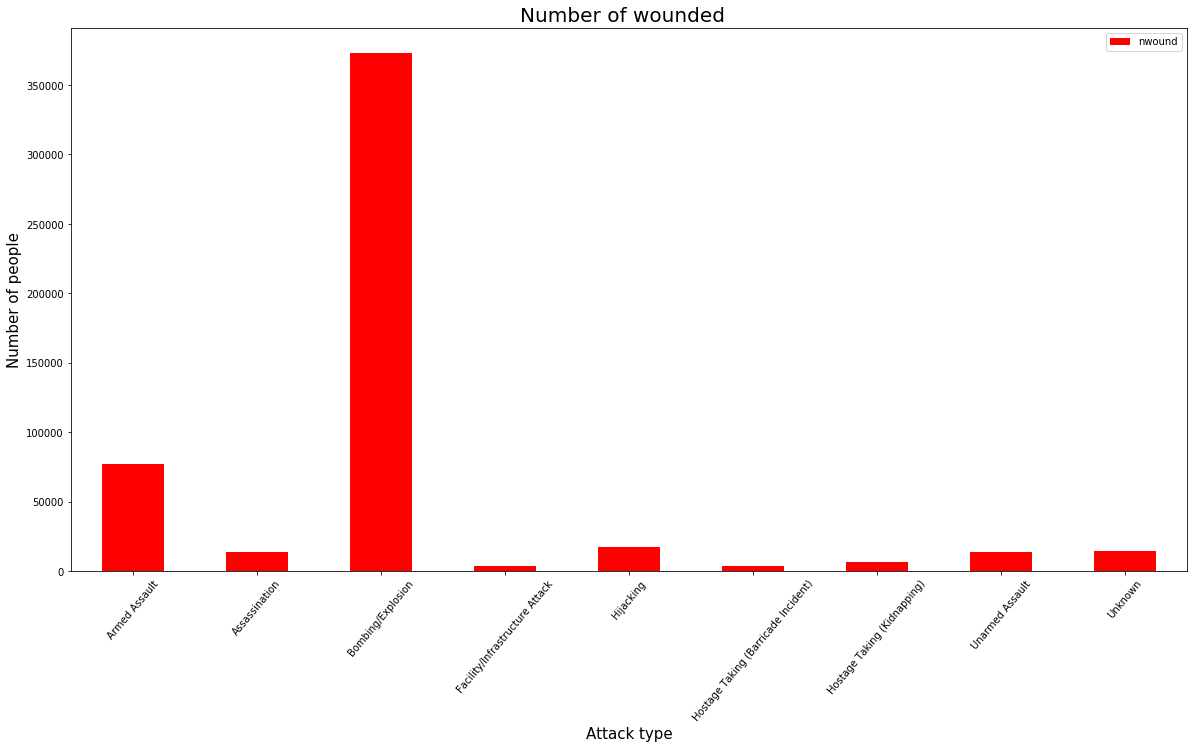

In [43]:
df[['attacktype1_txt','nwound']].groupby(df["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['red'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

Most number of people got wounded by Bombing/Explosion.

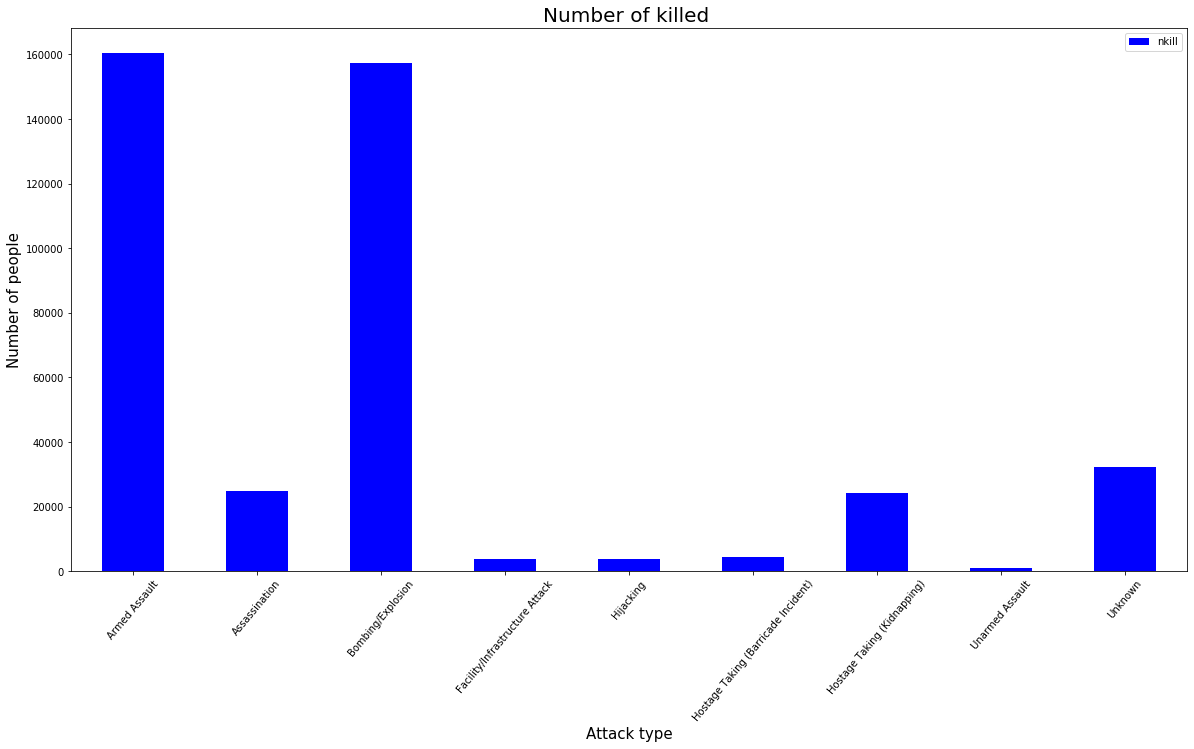

In [44]:
df[['attacktype1_txt','nkill']].groupby(df["attacktype1_txt"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['blue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

In [61]:
attack_Kill = df.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
attack_Kill

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


But most number of people got killed by Armed Assault followed by Bombing/Explosion.

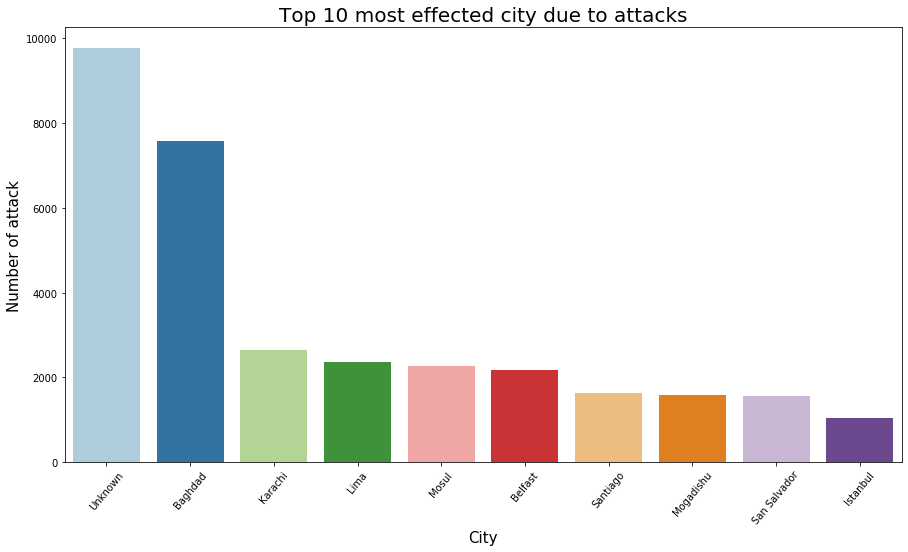

In [52]:
plt.subplots(figsize=(15,8))
sn.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values,palette="Paired")
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city due to attacks",fontsize=20)
plt.xticks(rotation = 50)
plt.show()


Baghdad is the most affected city due to terrorist activities

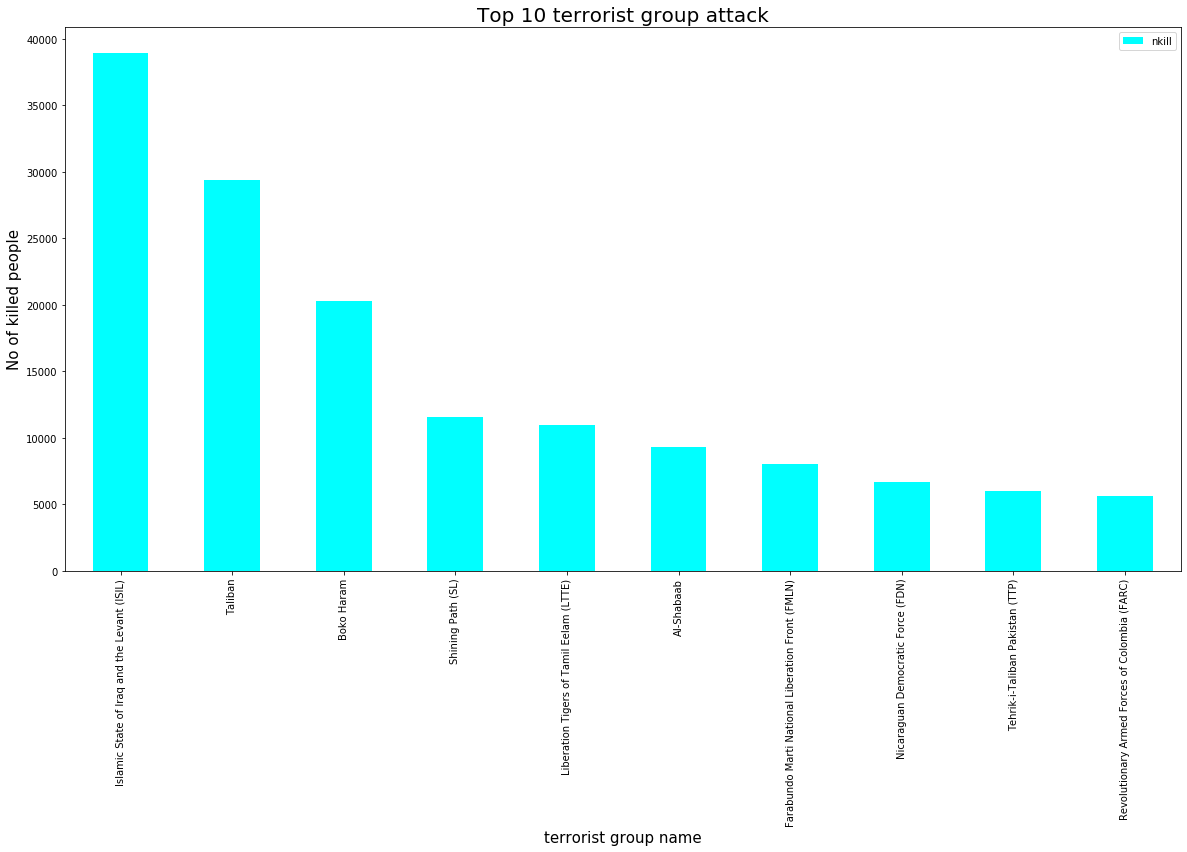

In [62]:
df[['gname','nkill']].groupby(['gname'],axis=0).sum().drop('Unknown').sort_values('nkill',ascending=False).head(10).plot(kind='bar',color='cyan',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

Terrorist group which has killed most number of people is Islamic State of Iraq and the Levant(ISIL) followed by Taliban.

In [56]:
kill =df[['gname','country_txt','nkill']]
kill=kill.groupby(['gname','country_txt'],axis=0).sum().sort_values('nkill',ascending=False).drop('Unknown').reset_index().head(10)
kill

C:\Users\RHYTHM RASTOGI\Anaconda3\lib\site-packages\pandas\core\generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,gname,country_txt,nkill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0
